In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
main_df = pd.DataFrame()

dataset = "COVID-19-geographic-disbtribution-worldwide-2020-12-14.csv"

df = pd.read_csv(dataset, error_bad_lines=False)

# df.set_index("dateRep", inplace=True)
df = df[["dateRep", "cases", "deaths", "countriesAndTerritories", "continentExp"]]

# converting the date to pandas date format
df["dateRep"]= pd.to_datetime(df["dateRep"])

df_uk = df[df['countriesAndTerritories'] == 'United_Kingdom'] # Full Lockdown
df_nz = df[df['countriesAndTerritories'] == 'New_Zealand'] # Full Lockdown
df_in = df[df['countriesAndTerritories'] == 'India'] # Full Lockdown
df_cr = df[df['countriesAndTerritories'] == 'Croatia'] # Partial Lockdown
df_se = df[df['countriesAndTerritories'] == 'Senegal'] # Partial Lockdown
df_br = df[df['countriesAndTerritories'] == 'Brazil'] # No Lockdown
df_sw = df[df['countriesAndTerritories'] == 'Sweden'] # No Lockdown

df_uk.head(10)

,dateRep,cases,deaths,countriesAndTerritories,continentExp
58378,2020-12-14,18447,144,United_Kingdom,Europe
58379,2020-12-13,21501,520,United_Kingdom,Europe
58380,2020-12-12,21672,424,United_Kingdom,Europe
58381,2020-12-11,20964,516,United_Kingdom,Europe
58382,2020-12-10,16578,533,United_Kingdom,Europe
58383,2020-12-09,12281,599,United_Kingdom,Europe
58384,2020-12-08,14718,189,United_Kingdom,Europe
58385,2020-12-07,17271,231,United_Kingdom,Europe
58386,2020-12-06,15539,397,United_Kingdom,Europe
58387,2020-12-05,16298,504,United_Kingdom,Europe


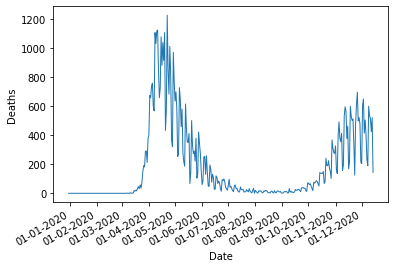

In [3]:
fig, ax = plt.subplots()
ax.plot('dateRep', 'deaths', data=df_uk, linewidth=1)
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Deaths')

plt.show()

In [4]:
print(df_uk.head())

         dateRep  cases  deaths countriesAndTerritories continentExp
58378 2020-12-14  18447     144          United_Kingdom       Europe
58379 2020-12-13  21501     520          United_Kingdom       Europe
58380 2020-12-12  21672     424          United_Kingdom       Europe
58381 2020-12-11  20964     516          United_Kingdom       Europe
58382 2020-12-10  16578     533          United_Kingdom       Europe


### Preprocessing

In [5]:
df_uk.isnull().sum()

dateRep                    0
cases                      0
deaths                     0
countriesAndTerritories    0
continentExp               0
dtype: int64

In [6]:
df_nz.isnull().sum()

dateRep                    0
cases                      0
deaths                     0
countriesAndTerritories    0
continentExp               0
dtype: int64

In [7]:
df_in.isnull().sum()

dateRep                    0
cases                      0
deaths                     0
countriesAndTerritories    0
continentExp               0
dtype: int64

In [8]:
df_cr.isnull().sum()

dateRep                    0
cases                      0
deaths                     0
countriesAndTerritories    0
continentExp               0
dtype: int64

In [9]:
df_se.isnull().sum()

dateRep                    0
cases                      0
deaths                     0
countriesAndTerritories    0
continentExp               0
dtype: int64

In [10]:
df_br.isnull().sum()

dateRep                    0
cases                      0
deaths                     0
countriesAndTerritories    0
continentExp               0
dtype: int64

In [11]:
df_sw.isnull().sum()

dateRep                    0
cases                      0
deaths                     0
countriesAndTerritories    0
continentExp               0
dtype: int64

### Exploratory Data Analysis

e:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cases', ylabel='Density'>

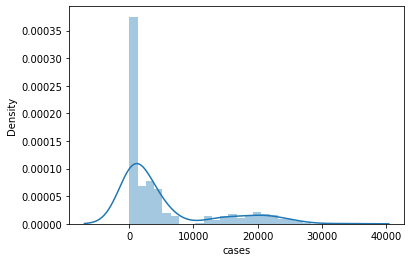

In [12]:
sns.distplot(df_uk['cases'])

e:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deaths', ylabel='Density'>

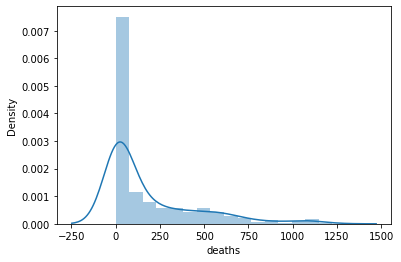

In [13]:
sns.distplot(df_uk['deaths'])

### Correlation Matrix


In [14]:
corr=df_uk.corr()

<AxesSubplot:>

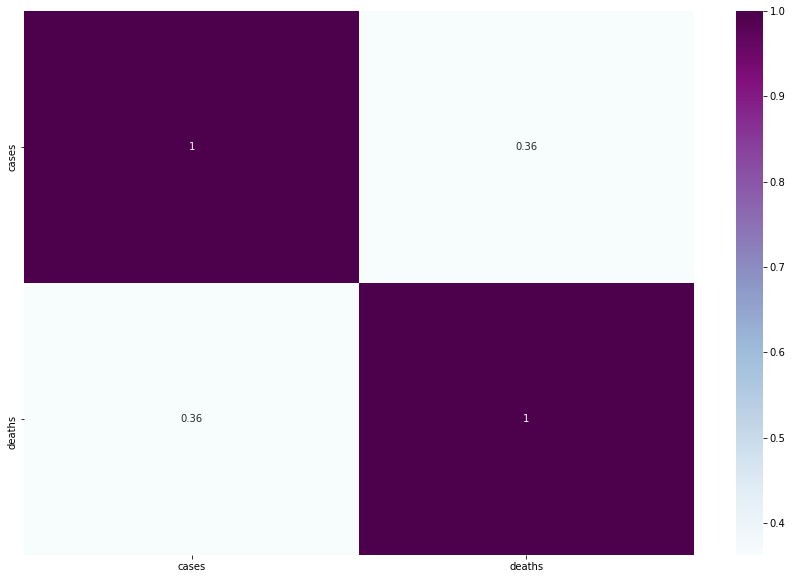

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

### KMeans Clustering

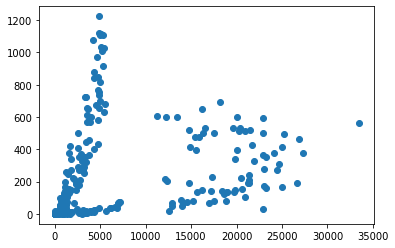

In [16]:
# Clustering for UK
X = df_uk['cases']
y = df_uk['deaths']
plt.scatter(X, y)

In [17]:
X = X.values.reshape(-1, 1) # reshaping X

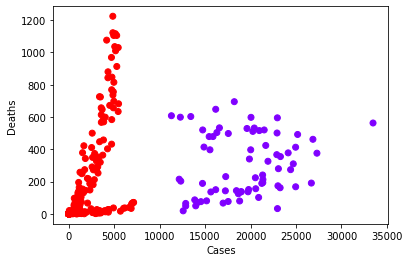

In [18]:
from sklearn.cluster import KMeans
est = KMeans(2)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

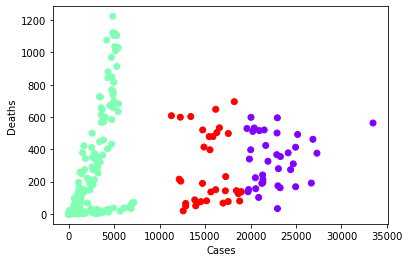

In [19]:
from sklearn.cluster import KMeans
est = KMeans(3)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

Text(0, 0.5, 'Sum of squared distance')

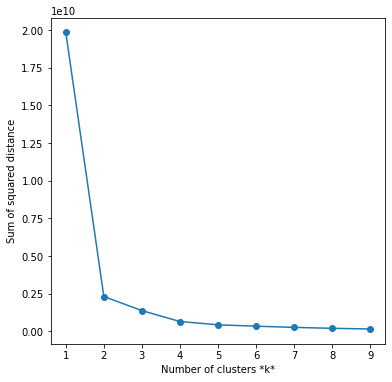

In [20]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

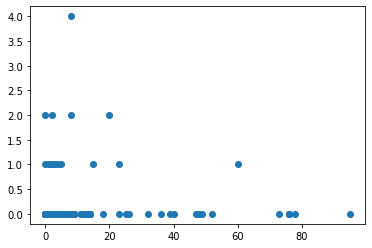

In [21]:
# Clustering for New Zealand
X = df_nz['cases']
y = df_nz['deaths']
plt.scatter(X, y)

In [22]:
X = X.values.reshape(-1, 1) # reshaping X

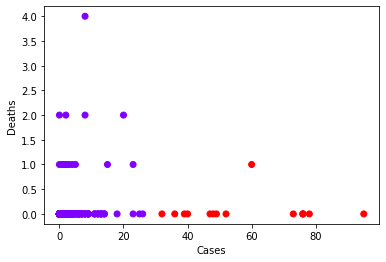

In [23]:
est = KMeans(2)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

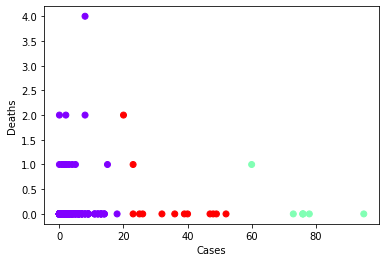

In [24]:
est = KMeans(3)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

Text(0, 0.5, 'Sum of squared distance')

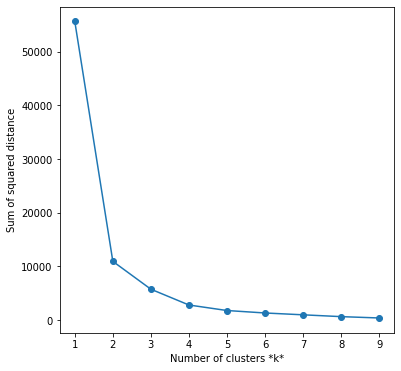

In [25]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

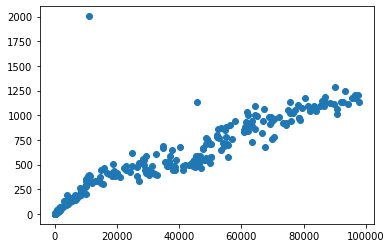

In [26]:
# Clustering for India
X = df_in['cases']
y = df_in['deaths']
plt.scatter(X, y)

In [27]:
X = X.values.reshape(-1, 1) # reshaping X

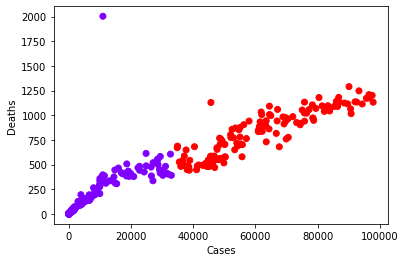

In [28]:
est = KMeans(2)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

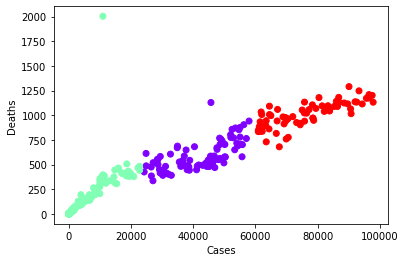

In [29]:
est = KMeans(3)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

Text(0, 0.5, 'Sum of squared distance')

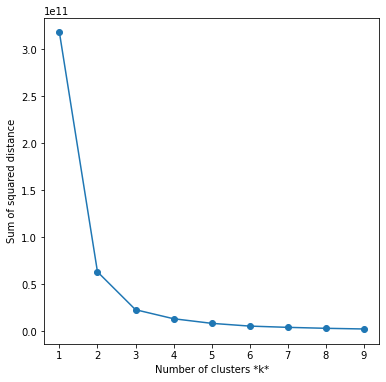

In [30]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

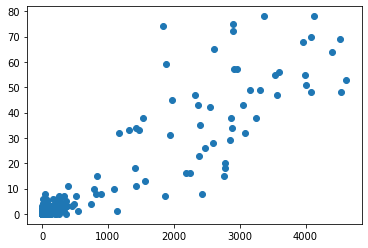

In [31]:
# Clustering for Croatia
X = df_cr['cases']
y = df_cr['deaths']
plt.scatter(X, y)

In [32]:
X = X.values.reshape(-1, 1) # reshaping X

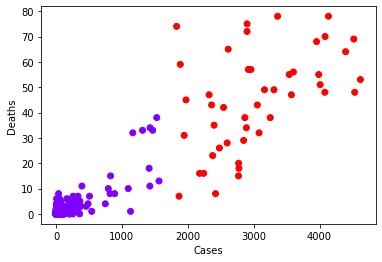

In [33]:
est = KMeans(2)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

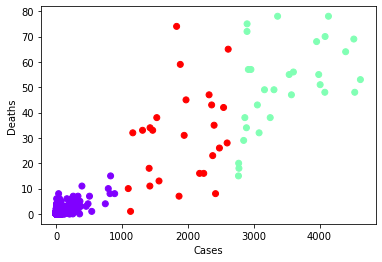

In [34]:
est = KMeans(3)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

Text(0, 0.5, 'Sum of squared distance')

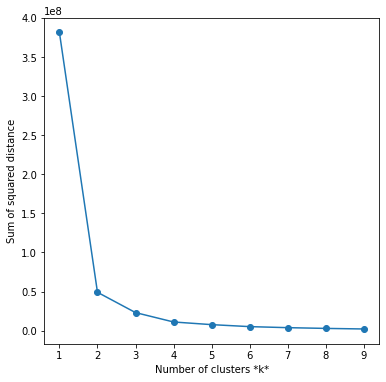

In [35]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

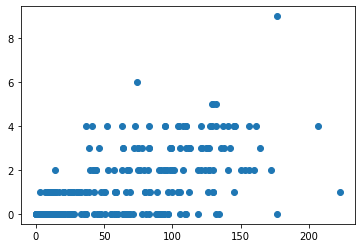

In [36]:
# Clustering for Senegal
X = df_se['cases']
y = df_se['deaths']
plt.scatter(X, y)

In [37]:
X = X.values.reshape(-1, 1) # reshaping X

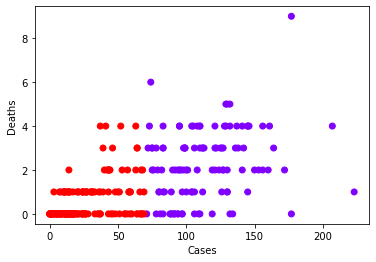

In [38]:
est = KMeans(2)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

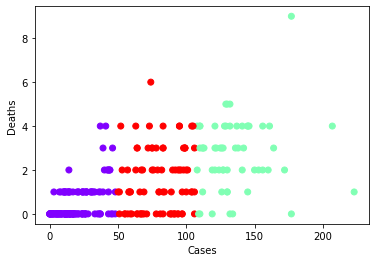

In [39]:
est = KMeans(3)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

Text(0, 0.5, 'Sum of squared distance')

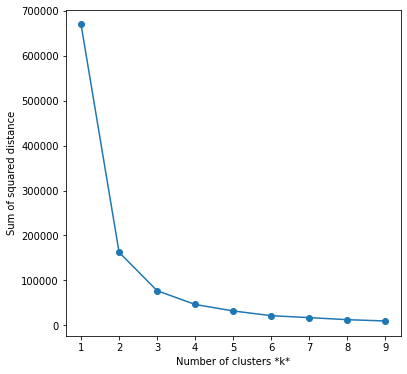

In [40]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

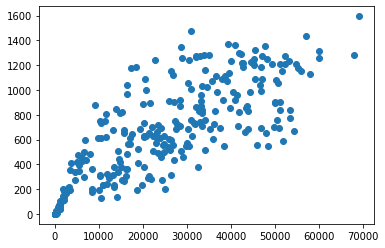

In [41]:
# Clustering for Brazil
X = df_br['cases']
y = df_br['deaths']
plt.scatter(X, y)

In [42]:
X = X.values.reshape(-1, 1) # reshaping X

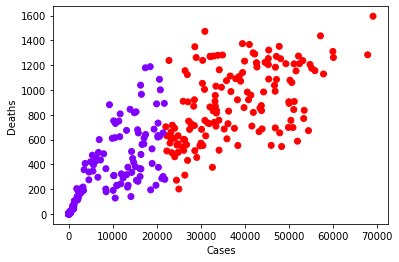

In [43]:
est = KMeans(2)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

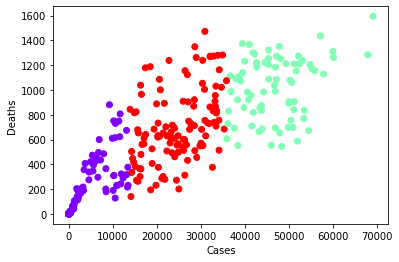

In [44]:
est = KMeans(3)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

Text(0, 0.5, 'Sum of squared distance')

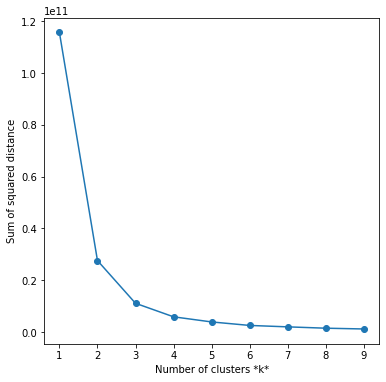

In [45]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

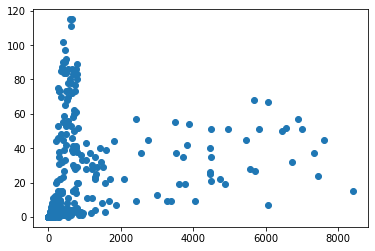

In [46]:
# Clustering for Sweden
X = df_sw['cases']
y = df_sw['deaths']
plt.scatter(X, y)

In [47]:
X = X.values.reshape(-1, 1) # reshaping X

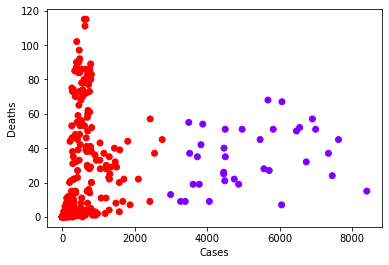

In [48]:
est = KMeans(2)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

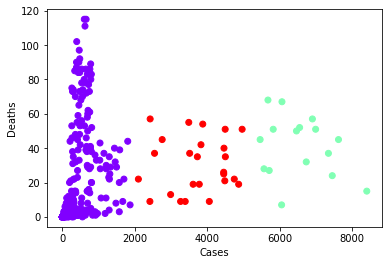

In [49]:
est = KMeans(3)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

Text(0, 0.5, 'Sum of squared distance')

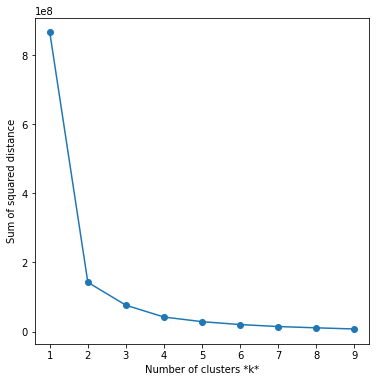

In [50]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')